Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

### Wczytanie wyników z results.csv do zmiennej mydata

In [10]:
mydata <- read.csv("results.csv")
print(mydata)

             type   size        time
1   vector-vector  10000 0.006522940
2   vector-vector  10000 0.000019067
3   vector-vector  10000 0.000017531
4   vector-vector  10000 0.000018648
5   vector-vector  10000 0.000017670
6   vector-vector  10000 0.000018019
7   vector-vector  10000 0.000018228
8   vector-vector  10000 0.000017670
9   vector-vector  10000 0.000017460
10  vector-vector  10000 0.000017321
11  vector-vector  20000 0.000066909
12  vector-vector  20000 0.000040019
13  vector-vector  20000 0.000040089
14  vector-vector  20000 0.000045327
15  vector-vector  20000 0.000039670
16  vector-vector  20000 0.000039600
17  vector-vector  20000 0.000039530
18  vector-vector  20000 0.000039670
19  vector-vector  20000 0.000039531
20  vector-vector  20000 0.000039531
21  vector-vector  30000 0.000057549
22  vector-vector  30000 0.000057969
23  vector-vector  30000 0.000057759
24  vector-vector  30000 0.000056781
25  vector-vector  30000 0.000057201
26  vector-vector  30000 0.000068165
2

### Wykres zależności średniego czasu operacji w zależności od rozmiaru wektora - iloczyn skalarny

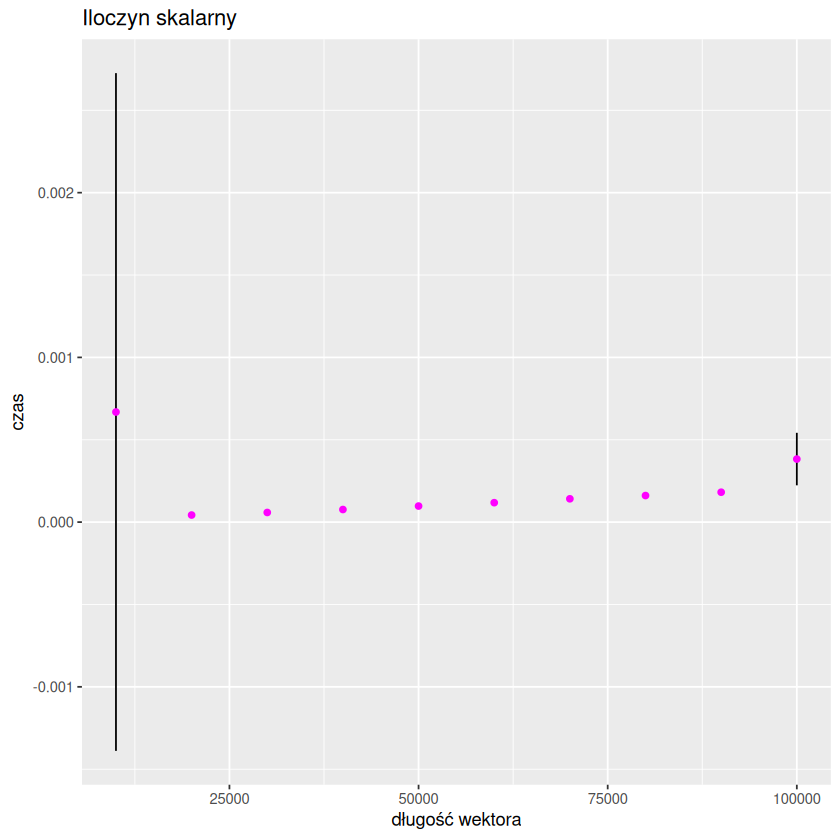

In [28]:
library(dplyr)
library(ggplot2)

# define a function to compute mean and std
mean_std <- function(x) c(mean=mean(x), std=sd(x))

# group by type and size and compute mean and std of time
result_vector <- mydata %>%
  group_by(type, size) %>%
  summarize(mean=mean(time), std=sd(time), .groups="drop") %>%
  filter(type=="vector-vector")

p1 <- ggplot(result_vector, aes(x=size, y=mean)) +
  geom_errorbar(aes(ymin=mean-std, ymax=mean+std), width=.1) +
  geom_point(color="magenta") +
  labs(title="Iloczyn skalarny", x="długość wektora", y="czas")

p1

### Wykres zależności średniego czasu operacji w zależności od rozmiaru wektora - mnożenie macierzy przez wektor

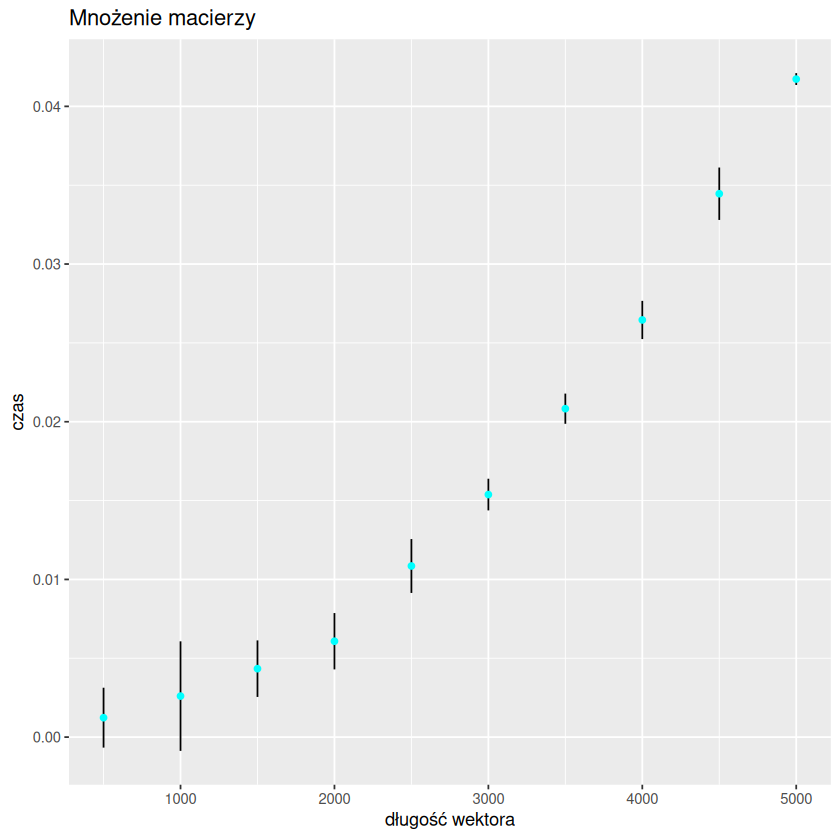

In [25]:
result_matrix <- mydata %>%
  group_by(type, size) %>%
  summarize(mean=mean(time), std=sd(time), .groups="drop") %>%
  filter(type=="matrix-vector")

p2 <- ggplot(result_matrix, aes(x=size, y=mean)) +
  geom_errorbar(aes(ymin=mean-std, ymax=mean+std), width=.1) +
  geom_point(color="cyan") +
  labs(title="Mnożenie macierzy", x="długość wektora", y="czas")

p2

### Oba wykresy we wspólnej tabeli

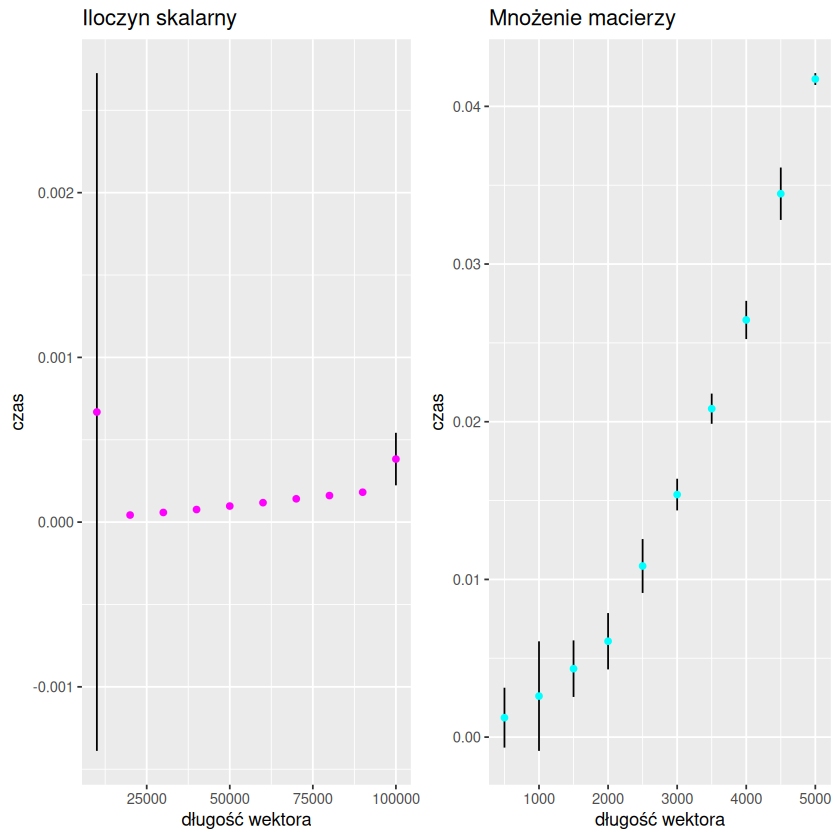

In [26]:
library(gridExtra)

# arrange plots side by side
grid.arrange(p1, p2, ncol=2)